<a href="https://colab.research.google.com/github/yulmu99/Playdata/blob/main/Deep_learning/2_Loading_and_normalizing_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Datasets ans Dataloaders
- torch.utils.data.Dataset 
- torch.utils.data.DataLoader

In [ ]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = 'data',  #데이터 저장 경로
    train = True,
    download =True,
    #transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train =False,
    download=True,
    transform=ToTensor()
)


In [ ]:
type(training_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [ ]:
len(training_data), len(test_data)  #데이터 수

(60000, 10000)

In [ ]:
torch.randint(len(training_data), size=(1,2,3))   

tensor([[[14329, 48704, 13864],
         [18825, 34797, 51621]]])

In [ ]:
torch.randint(len(training_data), size=(1,))

tensor([53996])

In [ ]:
torch.randint(len(training_data), size=(1,)).item()   #.item() : tensor -> python 

22339

In [ ]:
training_data[6375]    #이미지 데이터의 정보는 튜플로 저장 (feature, target)

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEBD07DCFD0>, 3)

In [ ]:

import numpy as np 

np.array(training_data[6375][0])   #[0] - feature 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 143,  40,   0,
          0,   0,   0,  90, 110,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 190, 214, 213,
        128, 174, 193, 227, 153,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167, 186, 174,
        206, 193, 231, 217, 138,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 233, 222, 207,
        181, 156, 228, 231, 219,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 121, 244, 223, 237,
        246, 247, 230, 224, 245,  89,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 237, 234, 228, 226,
        227, 226, 231, 227, 240, 197,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
np.array(training_data[6375][0]).shape  

(28, 28)

In [ ]:
training_data[6375][1]  #[1] :target

3

## Iterating and Visualizing the Dataset

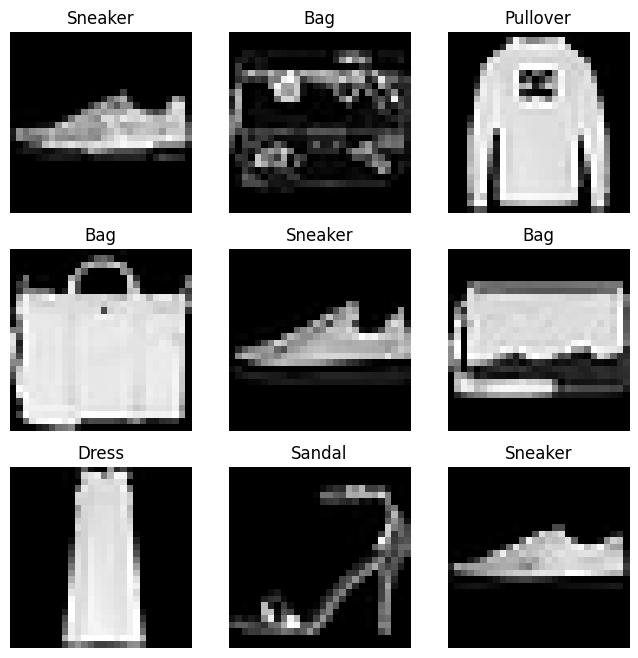

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(training_data),size=(1,)).item()
  img , label = training_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img,cmap='gray')   #흑백이면 'gray'
plt.show()


##Preparing your data for training with DataLoaders

In [ ]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size =64, shuffle=True)  

##Iterate through the DataLoader

In [ ]:
#display image and label

test_features, test_labels = next(iter(test_dataloader))
print(f'Feature batch shape: {test_features.size()}')   
print(f'Lables batch shape: {test_labels.size()}')

Feature batch shape: torch.Size([64, 1, 28, 28])
Lables batch shape: torch.Size([64])


[64, 1, 28, 28] -> 64는 배치사이즈 / (1,28,28)에서 1은 흑백의미

- 흑백은 1
- 컬러는 3

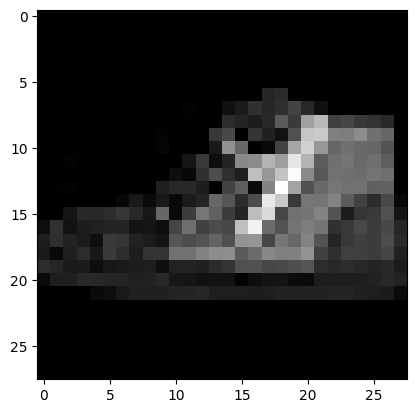

Lable: 7


In [ ]:
img = test_features[0].squeeze()  #64개의 이미지 중에 맨처음 image -> shape (1,28,28)에서 1의 차원 제거
label = test_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Lable: {label}')    

#2. Normalization(정규화)
> 이미지는 0~255사이의 값으로 구성
>> 값의 범위(scale)을 0~1 사이로 변경

## 비정규화

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds1 = datasets.FashionMNIST(
    root='data',
    train =True,
    download=True
)

In [ ]:
ds1[1]   #ds1에서 index 1 번째 image 정보

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEB0240D6D0>, 0)

In [ ]:
ds_features, ds_label = ds1[1]

In [ ]:
ds_features

In [ ]:
np.array(ds_features)

In [ ]:
ds_label  

0

## 정규화

In [ ]:
ds2 = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform = ToTensor(),  #feature 정규화
    target_transform = Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y),value =1))  #target 정규화 / One Hot Encoding   
)



In [ ]:
ds_features ,ds_label = ds2[1]

In [ ]:
ds_features

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

In [ ]:
ds_label  #label idx가 0 , 즉 T-Shirt 

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])